In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

#import test train split
from sklearn.model_selection import train_test_split


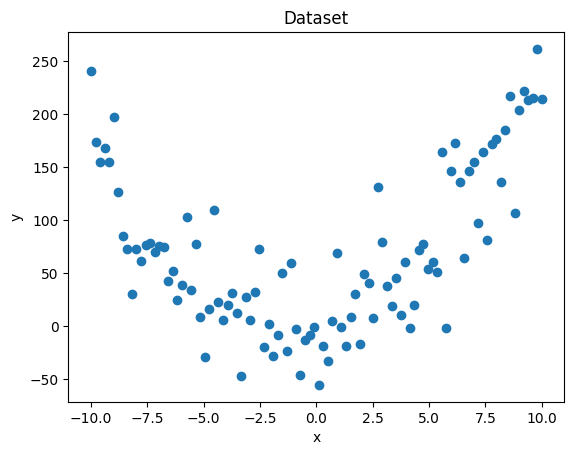

In [19]:
# generate a dataset of size 100 that is generally close to quadratic
# y = 2x^2 + 3x + 4
x = np.linspace(-10, 10, 100)
y = 2*x**2 + 3*x + 4
y = y + np.random.normal(0, 40, 100)

# plot the data
plt.scatter(x, y)
plt.title('Dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


Text(0.5, 1.0, 'Training Data')

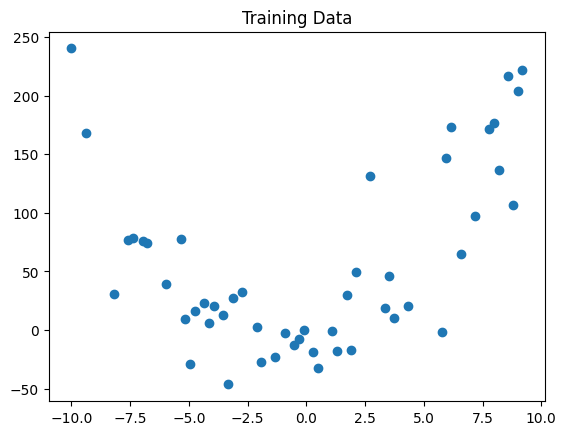

In [20]:
# split the data into training and testing sets 50 50
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

# plot the training data
plt.scatter(x_train, y_train)
plt.title('Training Data')


In [23]:
#use statsmodels to fit a quadratic model to the data
import statsmodels.api as sm
x_train_sq = x_train**2
X_train = np.column_stack((x_train, x_train_sq))
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     73.00
Date:                Sun, 23 Feb 2025   Prob (F-statistic):           3.83e-15
Time:                        11:33:01   Log-Likelihood:                -252.16
No. Observations:                  50   AIC:                             510.3
Df Residuals:                      47   BIC:                             516.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.6388      7.945     -1.087      0.2

[0.7640064611722486, 0.8026350436416773, 0.6933755769268337, 0.8130340711628599, 0.772056527608268, 0.7762407656223348, 0.7840838313800107, 0.7569063499650722, 0.8238646185027435, 0.8094325820420019]


Text(0.5, 0, 'R-squared')

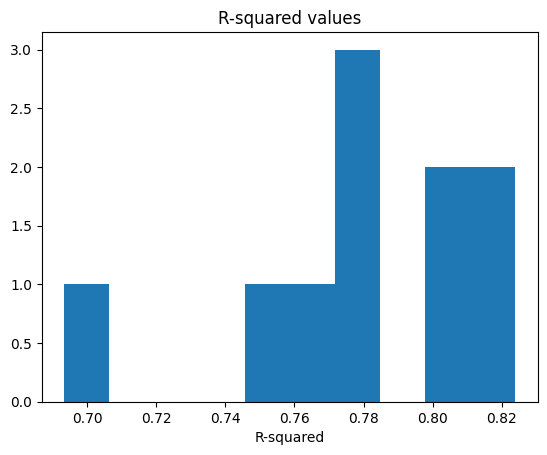

In [25]:
#repeat the test trains split and model fitting 10 times and store the each model's R-squared value
#and print all the R-squared values
r_squared_values = []
for i in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)
    x_train_sq = x_train**2
    X_train = np.column_stack((x_train, x_train_sq))
    X_train = sm.add_constant(X_train)
    model = sm.OLS(y_train, X_train)
    results = model.fit()
    r_squared_values.append(results.rsquared)
print(r_squared_values)

#graph the r-squared values
plt.hist(r_squared_values)
plt.title('R-squared values')
plt.xlabel('R-squared')

